In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Get hdfs dfs -ls information
access_df = pd.read_csv("../hadoop_reports/user_reports/2022-02-16/user_access_report.txt.gz", delim_whitespace=True)
access_df["user"] = access_df.path.str.split("/").str.get(-1)
access_df["last_mod_dt"] = pd.to_datetime(access_df.last_mod_date+" "+access_df.last_mod_time, format="%Y-%m-%d %H:%M")
# Define "dead" users as hadoop user dirs w/ last modification times before 2019
dead_users = access_df[access_df.last_mod_dt.dt.year < 2019].user.values
print(f"{len(dead_users)} dead users:")
print(dead_users)

11 dead users:
['areinsvo' 'balaji' 'bauerdic' 'bkansal' 'bmarsh' 'bockjoo' 'branson'
 'burkett' 'cawest' 'ccollard' 'lost+found']


In [3]:
# Get hdfs dfs -du information
usage_df = pd.read_csv("../hadoop_reports/user_reports/2022-02-16/user_usage_report.txt.gz", delim_whitespace=True)
usage_df["user"] = usage_df.path.str.split("/").str.get(-1)
# Compute avg. replication rate
usage_df["avg_rep_rate"] = usage_df.after_rep/usage_df.before_rep
# Sort by usage
usage_df.sort_values("after_rep", ascending=False, inplace=True, ignore_index=True)

In [4]:
# Compute amount of storage used by dead users
dead_data = np.sum(usage_df[np.isin(usage_df.user, dead_users)].after_rep)/(10**12)
print(f"{dead_data:0.2f} TB (after replication) is used by dead users")
# Compute total storage used by all users
all_data = np.sum(usage_df.after_rep)/(10**12)
print(f"{all_data:0.2f} TB (after replication) used by all users")
# Compute fraction of total user presence used by dead users
print(f"{dead_data/all_data*100:0.1f}% of data (after replication) is from dead users")

15.78 TB (after replication) is used by dead users
883.79 TB (after replication) used by all users
1.8% of data (after replication) is from dead users


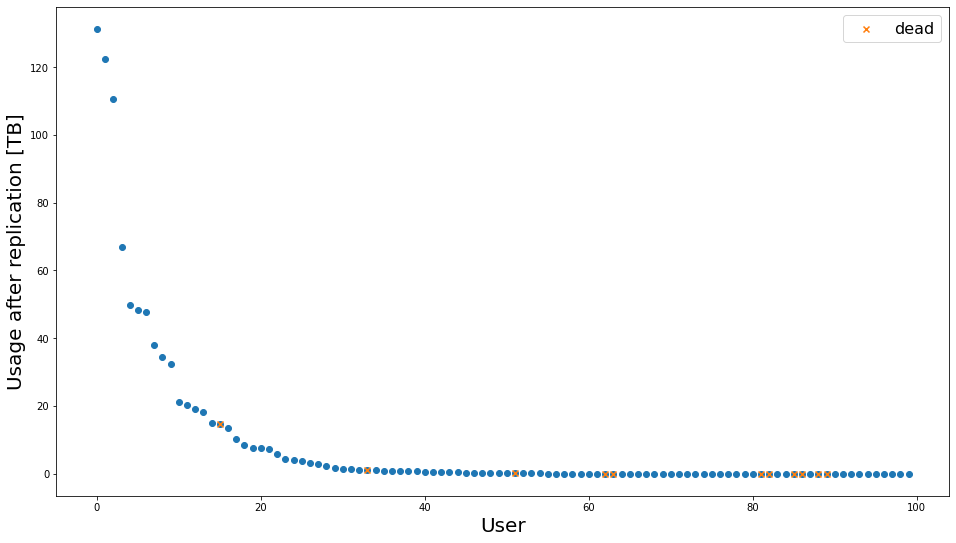

In [5]:
fig, axes = plt.subplots(figsize=(16, 9))
# Plot everyone's data usage
axes.scatter(
    usage_df.index,
    usage_df.after_rep/(10**12)
);
# Plot an X over dead users
axes.scatter(
    usage_df[np.isin(usage_df.user, dead_users)].index,
    usage_df[np.isin(usage_df.user, dead_users)].after_rep/(10**12),
    marker="x",
    label="dead"
)
axes.set_ylabel("Usage after replication [TB]", size=20);
axes.set_xlabel("User", size=20);
axes.legend(fontsize=16);

In [6]:
# Get top 20 (by amount of data) live users
top_live = usage_df[:20].copy()
# Convert the "after_rep" column to human-readable format
top_live["after_rep_TB"] = top_live.after_rep/10**12
# Display the dataframe
top_live

,before_rep,after_rep,path,user,avg_rep_rate,after_rep_TB
0,53355276338882,131276043636999,/cms/store/user/hmei,hmei,2.460414,131.276044
1,46871776317902,122505301601167,/cms/store/user/fsetti,fsetti,2.613626,122.505302
2,53827054111864,110676298421830,/cms/store/user/usarica,usarica,2.056146,110.676298
3,35673210739568,66951863543460,/cms/store/user/mcitron,mcitron,1.876811,66.951864
4,20408674027230,49813468692730,/cms/store/user/phchang,phchang,2.440799,49.813469
5,17746151449292,48413924989216,/cms/store/user/dspitzba,dspitzba,2.728137,48.413925
6,18294357381556,47739668101333,/cms/store/user/rgerosa,rgerosa,2.609530,47.739668
7,18644865383134,37923985805586,/cms/store/user/namin,namin,2.034018,37.923986
8,17129382648203,34264249468060,/cms/store/user/rkansal,rkansal,2.000320,34.264249
9,10915919806023,32461859010939,/cms/store/user/ksalyer,ksalyer,2.973809,32.461859


In [7]:
# Get top 20 (by amount of data) dead users
top_dead = usage_df[np.isin(usage_df.user, dead_users)][:20].copy()
# Convert the "after_rep" column to human-readable format
top_dead["after_rep_TB"] = top_dead.after_rep/10**12
# Display the dataframe
top_dead

,before_rep,after_rep,path,user,avg_rep_rate,after_rep_TB
15,7374967263366,14749934526732,/cms/store/user/branson,branson,2.0,1.474993e+01
33,488046580152,976093160304,/cms/store/user/lost+found,lost+found,2.0,9.760932e-01
51,24570445134,49140890268,/cms/store/user/bkansal,bkansal,2.0,4.914089e-02
62,1506,3012,/cms/store/user/bauerdic,bauerdic,2.0,3.012000e-09
63,1506,3012,/cms/store/user/bockjoo,bockjoo,2.0,3.012000e-09
81,0,0,/cms/store/user/areinsvo,areinsvo,NaN,0.000000e+00
82,0,0,/cms/store/user/balaji,balaji,NaN,0.000000e+00
85,0,0,/cms/store/user/bmarsh,bmarsh,NaN,0.000000e+00
86,0,0,/cms/store/user/burkett,burkett,NaN,0.000000e+00
88,0,0,/cms/store/user/cawest,cawest,NaN,0.000000e+00


In [8]:
def write_grim_reaper(paths):
    with open("grim_reaper.sh", "w") as f_out:
        f_out.write("#!/bin/bash\n")
        f_out.write("cat << EOF\n")
        f_out.write("WARNING: Delete the following paths?\n"+"\n".join(paths)+"\n")
        f_out.write("EOF\n")
        f_out.write("read -p 'Proceed? (Y/N): ' resp && [[ $resp == [yY] || $resp == [yY][eE][sS] ]] || exit 1\n")
        for path in paths:
            f_out.write(f"rm -rf /hadoop{path}\n")
            
write_grim_reaper(top_dead["path"])

In [9]:
def plot_lorenz_curve(usage_df, N_points=500, no_plot=False):
    """Fraction of wealth held by actors with wealth < w vs. fraction of actors that
       hold wealth < w, where w is some percentage of the total wealth
    """
    # Compute diagnostic information about population
    total_wealth = np.sum(usage_df.after_rep)
    sorted_bank = usage_df.sort_values("after_rep", ascending=False).after_rep.values
    N_actors = len(usage_df.user)
    # Compute values for Lorenz curve
    cumulative_wealth = []
    cumulative_actors = []
    for p in np.linspace(0, 1, N_points):
        actors_with_lt_w = sorted_bank < total_wealth*p
        # Fraction of wealth held by actors with wealth < w
        cumulative_wealth.append(
            np.sum(sorted_bank[actors_with_lt_w])/total_wealth
        )
        # Fraction of actors that hold wealth < w
        cumulative_actors.append(np.sum(actors_with_lt_w)/N_actors)
    # Cast to numpy arrays
    cumulative_wealth = np.array(cumulative_wealth)
    cumulative_actors = np.array(cumulative_actors)     
    # Calculate Gini coefficient
    gini = (np.trapz(cumulative_actors, cumulative_wealth)-0.5)/0.5
    if no_plot:
        return gini
    else:
        # Set up plot
        fig = plt.figure(figsize=(10,10))
        axes = plt.subplot(111)
        axes.set_aspect(1.0)
        # Fill plot
        plt.scatter(cumulative_actors, cumulative_wealth, s=10);
        plt.xlabel("Cumulative Population", size=16);
        plt.ylabel("Cumulative Wealth", size=16);
        plt.title("Lorenz Curve (Gini = {:.3f})".format(gini), size=16);
        return

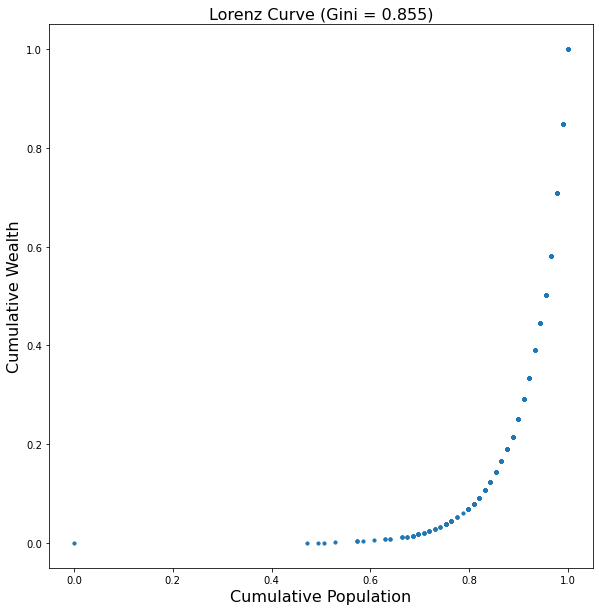

In [10]:
plot_lorenz_curve(usage_df[~np.isin(usage_df.user, dead_users)], N_points=10000)